<a href="https://colab.research.google.com/github/Sonia3631/WEEK-3-AI-ASSIGNMENT/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8560 - loss: 0.4855 - val_accuracy: 0.9616 - val_loss: 0.1335
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9557 - loss: 0.1499 - val_accuracy: 0.9707 - val_loss: 0.0992
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.1066 - val_accuracy: 0.9750 - val_loss: 0.0856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9735 - loss: 0.0856 - val_accuracy: 0.9775 - val_loss: 0.0754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9792 - loss: 0.0675 - val_accuracy: 0.9779 - val_loss: 0.0710


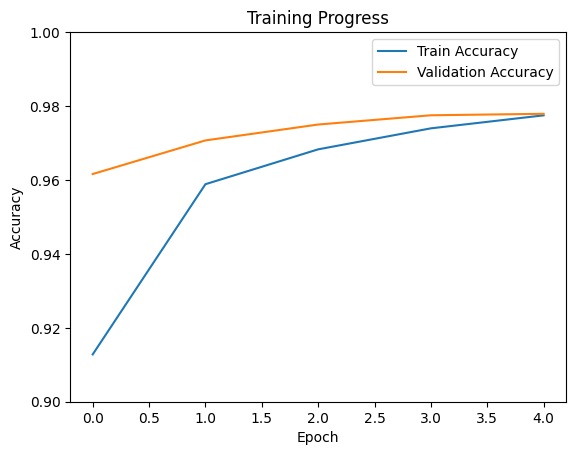

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


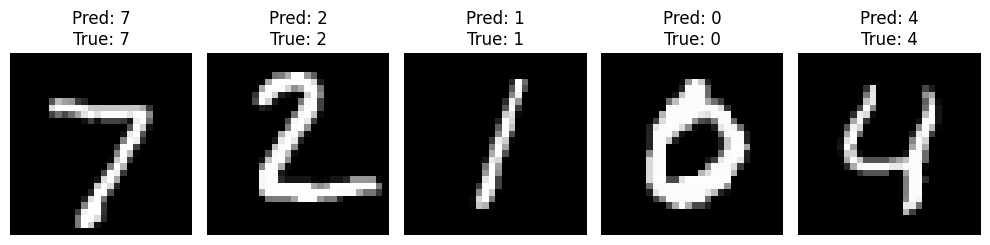

In [1]:
# ==== IMPORTS ====
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ==== DATA LOADING & PREPROCESSING ====
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# ==== MODEL BUILDING ====
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# ==== TRAINING ====
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=5,
                   validation_data=(X_test, y_test))

# ==== VISUALIZATION 1: TRAINING CURVES ====
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend()
plt.title('Training Progress')
plt.show()

# ==== VISUALIZATION 2: SAMPLE PREDICTIONS ====
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    pred = np.argmax(model.predict(X_test[i:i+1]))
    plt.title(f"Pred: {pred}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()